# Sequence Space Analysis

In [1]:
import networkx as nx
from Bio import AlignIO as aliio
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tqdm
plt.rcParams['svg.fonttype'] = 'none'

## Loading the data

In [2]:
def alignment_to_df(file):
    out = []
    for sequence in aliio.read(file, format='fasta'):
        out.append(dict(id=sequence.id, seq=str(sequence.seq)))
    return pd.DataFrame.from_records(out)

In [3]:
aln_D = alignment_to_df('../sequences/AGNifAlign105.ext-anc.alt.D.fasta')
aln_K = alignment_to_df('../sequences/AGNifAlign105.ext-anc.alt.K.fasta')
aln_H = alignment_to_df('../sequences/AGNifAlign105.ext-anc.alt.H.fasta')
aln_DK = pd.merge(aln_D, aln_K, on='id', suffixes=['_D', '_K'])
aln_DKH = pd.merge(aln_DK, aln_H, on='id', how='inner').rename(columns={'seq': 'seq_H'})
del aln_DK, aln_D, aln_H, aln_K
aln_DKH

,id,seq_D,seq_K,seq_H
0,1207_alt4,-------------MSKK-----------------------------...,----------------------------------------------...,----------------------------------------------...
1,1207_alt5,-------------MSEN-----------------------------...,----------------------------------------------...,----------------------------------------------...
2,1207_map,-------------MSEK-----------------------------...,----------------------------------------------...,----------------------------------------------...
3,1207_alt2,-------------MSED-----------------------------...,----------------------------------------------...,----------------------------------------------...
4,1207_alt3,-------------MSTK-----------------------------...,----------------------------------------------...,----------------------------------------------...
...,...,...,...,...
2684,Nif_archaeon_BMS3Bbin15,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...
2685,Nif_Candidatus_Viridilinea_mediisalina,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...
2686,Nif_Chloroflexales_bacterium_ZM16-3,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...
2687,Nif_Oscillochloris_trichoides,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...


In [4]:
aln_DKH['DDKK'] = aln_DKH.apply(lambda x: x.seq_D + x.seq_K, axis=1)
aln_DKH

,id,seq_D,seq_K,seq_H,DDKK
0,1207_alt4,-------------MSKK-----------------------------...,----------------------------------------------...,----------------------------------------------...,-------------MSKK-----------------------------...
1,1207_alt5,-------------MSEN-----------------------------...,----------------------------------------------...,----------------------------------------------...,-------------MSEN-----------------------------...
2,1207_map,-------------MSEK-----------------------------...,----------------------------------------------...,----------------------------------------------...,-------------MSEK-----------------------------...
3,1207_alt2,-------------MSED-----------------------------...,----------------------------------------------...,----------------------------------------------...,-------------MSED-----------------------------...
4,1207_alt3,-------------MSTK-----------------------------...,----------------------------------------------...,----------------------------------------------...,-------------MSTK-----------------------------...
...,...,...,...,...,...
2684,Nif_archaeon_BMS3Bbin15,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...
2685,Nif_Candidatus_Viridilinea_mediisalina,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...
2686,Nif_Chloroflexales_bacterium_ZM16-3,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...
2687,Nif_Oscillochloris_trichoides,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...


In [5]:
def compute_identity(seq1, seq2):
    counter = 0
    for a, b in filter(lambda x: x[0] != '-' and x[1] != 'y', zip(seq1, seq2)):
        if a == b:
            counter +=1
    return counter / min(len(seq1.replace('-', '')), len(seq2.replace('-', '')))

assert(compute_identity('AAAAAA', 'AAAAAA') == 1.0)
assert(compute_identity('AAAAAA', 'BBBBBB') == 0.0)
assert(compute_identity('AAAAAA', '-----B') == 0.0)

In [6]:
def find_alternatives(x):
    for tag in ['_alt1', '_alt2', '_alt3', '_alt4', '_alt5', '_altall']:
        if x.find(tag) != -1:
            return True
    return False

assert(find_alternatives('sadasad_alt1') is True)
assert(find_alternatives('sadasad_alernaria') is False)
assert(find_alternatives('sadasad_ale') is False)

In [7]:
def place_anc_tag(x):
    try:
        int(x.split('_')[0])
        return 'Anc_' + x
    except:
        return x

aln_DKH['id'] = aln_DKH['id'].apply(place_anc_tag)
aln_DKH['type'] = aln_DKH['id'].apply(lambda x: x.split('_')[0])
aln_DKH['variant'] = aln_DKH['id'].apply(find_alternatives)
aln_DKH

,id,seq_D,seq_K,seq_H,DDKK,type,variant
0,Anc_1207_alt4,-------------MSKK-----------------------------...,----------------------------------------------...,----------------------------------------------...,-------------MSKK-----------------------------...,Anc,True
1,Anc_1207_alt5,-------------MSEN-----------------------------...,----------------------------------------------...,----------------------------------------------...,-------------MSEN-----------------------------...,Anc,True
2,Anc_1207_map,-------------MSEK-----------------------------...,----------------------------------------------...,----------------------------------------------...,-------------MSEK-----------------------------...,Anc,False
3,Anc_1207_alt2,-------------MSED-----------------------------...,----------------------------------------------...,----------------------------------------------...,-------------MSED-----------------------------...,Anc,True
4,Anc_1207_alt3,-------------MSTK-----------------------------...,----------------------------------------------...,----------------------------------------------...,-------------MSTK-----------------------------...,Anc,True
...,...,...,...,...,...,...,...
2684,Nif_archaeon_BMS3Bbin15,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,Nif,False
2685,Nif_Candidatus_Viridilinea_mediisalina,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,Nif,False
2686,Nif_Chloroflexales_bacterium_ZM16-3,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,Nif,False
2687,Nif_Oscillochloris_trichoides,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,Nif,False


In [8]:
aln_DKH_noalt = aln_DKH.query('variant == False').copy()
aln_DKH_noalt

,id,seq_D,seq_K,seq_H,DDKK,type,variant
2,Anc_1207_map,-------------MSEK-----------------------------...,----------------------------------------------...,----------------------------------------------...,-------------MSEK-----------------------------...,Anc,False
9,Anc_1213_map,-------------MSEKK----------------------VK----...,------MSE-AAAV--------------------------------...,----------------------------------------------...,-------------MSEKK----------------------VK----...,Anc,False
18,Anc_1215_map,-------------MSERK----------------------------...,------MSA-EAAV--------------------------------...,----------------------------------------------...,-------------MSERK----------------------------...,Anc,False
21,Anc_1214_map,-------------MSERK----------------------------...,------MSA-EAAV--------------------------------...,----------------------------------------------...,-------------MSERK----------------------------...,Anc,False
29,Anc_1216_map,-------------MSEK-----------------------IK----...,------MAN-ALGL--------------------------------...,----------------------------------------------...,-------------MSEK-----------------------IK----...,Anc,False
...,...,...,...,...,...,...,...
2684,Nif_archaeon_BMS3Bbin15,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,Nif,False
2685,Nif_Candidatus_Viridilinea_mediisalina,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,Nif,False
2686,Nif_Chloroflexales_bacterium_ZM16-3,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,Nif,False
2687,Nif_Oscillochloris_trichoides,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,Nif,False


## Computing sequence identity

In [10]:
sequence_similarity_matrix = []

for i1, seq1 in tqdm.tqdm(aln_DKH_noalt.iterrows(), total=len(aln_DKH_noalt)):
    for i2, seq2 in aln_DKH_noalt.iterrows():
        sequence_similarity_matrix.append(
            dict(
                id1=seq1.id, id2=seq2.id, 
                identity=compute_identity(seq1['DDKK'], seq2['DDKK']),
                type1=seq1.type, type2=seq2.type
            )
        )

sequence_similarity_matrix = pd.DataFrame.from_records(sequence_similarity_matrix)

100%|██████████| 769/769 [02:00<00:00,  6.36it/s]


/home/bcz/miniconda3/envs/bst/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


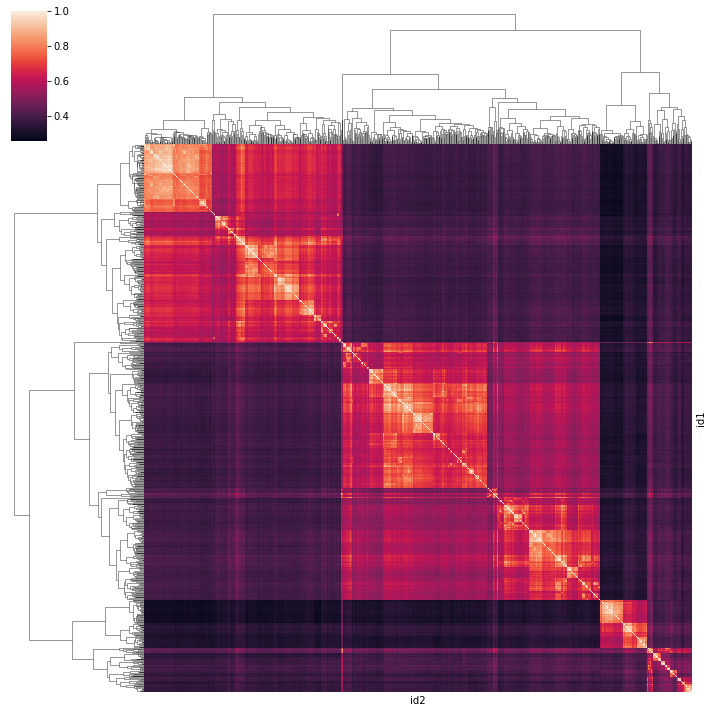

In [11]:
sequence_similarity_matrix_pivot = pd.pivot(data=sequence_similarity_matrix, index='id1', columns='id2', values='identity')
sns.clustermap(sequence_similarity_matrix_pivot, yticklabels=False,xticklabels=False)

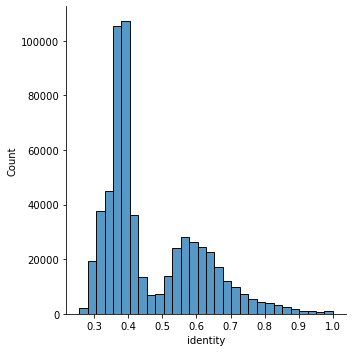

In [12]:
sns.displot(x='identity', data=sequence_similarity_matrix, bins=30)

In [12]:
sequence_similarity_matrix['type'] = sequence_similarity_matrix.apply(
    lambda x: 'Anc' if x['type1'] == 'Anc' or x['type2'] == 'Anc' else 'Ext', axis=1
)
sequence_similarity_matrix

,id1,id2,identity,type1,type2,type
0,Anc_1207_map,Anc_1207_map,1.000000,Anc,Anc,Anc
1,Anc_1207_map,Anc_1213_map,0.756669,Anc,Anc,Anc
2,Anc_1207_map,Anc_1215_map,0.735651,Anc,Anc,Anc
3,Anc_1207_map,Anc_1214_map,0.735651,Anc,Anc,Anc
4,Anc_1207_map,Anc_1216_map,0.725141,Anc,Anc,Anc
...,...,...,...,...,...,...
591356,Nif_Roseiflexus_castenholzii,Nif_archaeon_BMS3Bbin15,0.728261,Nif,Nif,Ext
591357,Nif_Roseiflexus_castenholzii,Nif_Candidatus_Viridilinea_mediisalina,0.840686,Nif,Nif,Ext
591358,Nif_Roseiflexus_castenholzii,Nif_Chloroflexales_bacterium_ZM16-3,0.843009,Nif,Nif,Ext
591359,Nif_Roseiflexus_castenholzii,Nif_Oscillochloris_trichoides,0.841503,Nif,Nif,Ext


<AxesSubplot:xlabel='identity', ylabel='Percent'>

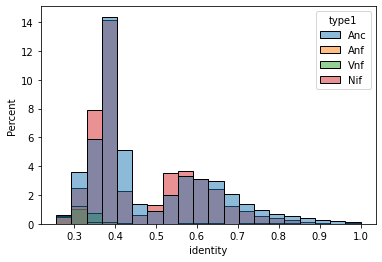

In [15]:
sns.histplot(
    x='identity', 
    data=sequence_similarity_matrix, 
    bins=20, hue='type1', stat='percent'
)

## Generating networks

In [16]:
def create_sequence_similarity_network(df, threshold=0.7):

    G = nx.Graph()

    for _, row in df.iterrows():
        G.add_node(row.id1, type=row.type1)
        G.add_node(row.id2, type=row.type2)
        if row.identity > threshold:
            G.add_edge(row.id1, row.id2)

    return G

In [19]:
network_features = []

for threshold in np.arange(0.3, 1.0, 0.05):
    G = create_sequence_similarity_network(sequence_similarity_matrix, threshold=threshold)
    network_features.append(
        dict(
            threshold=threshold, 
            n_clusters=nx.number_connected_components(G),
            n_edges=nx.number_of_edges(G),
            clustering=nx.average_clustering(G),
            density=nx.density(G)   
        )
    )

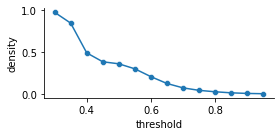

In [20]:
g = sns.relplot(
    data=pd.DataFrame.from_records(network_features),
    x='threshold', y='density', kind='line' , height=2.0, aspect=2.0
)
g.map(sns.scatterplot, 'threshold', 'density', data=pd.DataFrame.from_records(network_features))

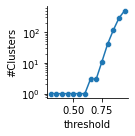

In [37]:
g = sns.relplot(
    data=pd.DataFrame.from_records(network_features),
    x='threshold', y='n_clusters', kind='line', height=2.0, aspect=1.0 
)
g.map(sns.scatterplot, 'threshold', 'n_clusters', data=pd.DataFrame.from_records(network_features))
g.axes[0, 0].set_yscale('log')
g.set_ylabels('#Clusters')
g.savefig('../figures/ddkk.relplot-identity-threshold-nclusters.svg')
g.savefig('../figures/ddkk.relplot-identity-threshold-nclusters.png', dpi=300)


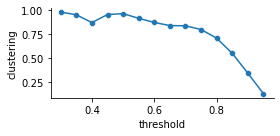

In [23]:
g = sns.relplot(
    data=pd.DataFrame.from_records(network_features),
    x='threshold', y='clustering', kind='line' , height=2.0, aspect=2.0
)
g.map(sns.scatterplot, 'threshold', 'clustering', data=pd.DataFrame.from_records(network_features))

## Centrality

In [24]:
all_ssn = create_sequence_similarity_network(sequence_similarity_matrix, threshold=0.700)
all_ssn_centrality = nx.betweenness_centrality(all_ssn)

In [25]:
all_ssn_centrality = pd.DataFrame.from_dict(
    all_ssn_centrality, orient='index').reset_index().rename(columns={0: 'btw_centrality', 'index': 'id'})
all_ssn_centrality['log_btw_centrality'] = all_ssn_centrality['btw_centrality'].apply(lambda x: np.log10(x))
all_ssn_centrality = pd.merge(all_ssn_centrality, aln_DKH[['id', 'type']], on='id')

In [26]:
all_ssn_centrality

,id,btw_centrality,log_btw_centrality,type
0,Anc_1207_map,3.994962e-01,-0.398487,Anc
1,Anc_1213_map,2.085412e-03,-2.680808,Anc
2,Anc_1215_map,1.912095e-03,-2.718491,Anc
3,Anc_1214_map,1.912095e-03,-2.718491,Anc
4,Anc_1216_map,1.827767e-03,-2.738079,Anc
...,...,...,...,...
764,Nif_archaeon_BMS3Bbin15,5.658772e-06,-5.247278,Nif
765,Nif_Candidatus_Viridilinea_mediisalina,0.000000e+00,-inf,Nif
766,Nif_Chloroflexales_bacterium_ZM16-3,9.700751e-07,-6.013195,Nif
767,Nif_Oscillochloris_trichoides,9.700751e-07,-6.013195,Nif


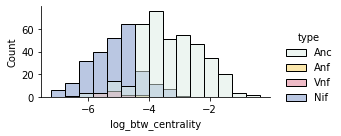

In [35]:
palette = {
    'Anc': '#DCEDE4',
    'Nif': '#7690C6', 
    'Vnf': '#E17891',
    'Anf': '#F9D15B',
}
g = sns.displot(
    data=all_ssn_centrality, x='log_btw_centrality', 
    hue='type', height=2.0, aspect=2.0, 
    palette=palette, bins=15
)
g.savefig('../figures/ddkk-histogram-btw-sequence-centrality.svg')
g.savefig('../figures/ddkk-histogram-btw-sequence-centrality.png', dpi=300)

In [30]:
def place_anc_tag(x):
    try:
        int(x.split('_')[0])
        return 'Anc_' + x + '_map'
    except:
        return x

distances_from_root = pd.read_csv('../data/tree/AGNifAlign103.asr.dist821.csv').rename(columns={'node': 'id'})
distances_from_root['id'] = distances_from_root['id'].apply(place_anc_tag)
distances_from_root

,id,dist_from_821
0,Anc_771_map,1.829611
1,Anc_772_map,1.795645
2,Anc_781_map,1.776833
3,Anc_783_map,1.756560
4,Anc_784_map,1.709936
...,...,...
1533,Anf_Dickeya_paradisiaca,2.029534
1534,Anf_Rahnella_sp_AA,2.062973
1535,Anf_Thiorhodococcus_drewsii,2.017386
1536,Anf_Geobacter_thiogenes,1.970585


In [31]:
all_ssn_centrality = pd.merge(all_ssn_centrality, distances_from_root, on='id')

/home/bcz/miniconda3/envs/bst/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/bcz/miniconda3/envs/bst/lib/python3.9/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/home/bcz/miniconda3/envs/bst/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/bcz/miniconda3/envs/bst/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/bcz/miniconda3/envs/bst/lib/python3.9/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/home/bcz/miniconda3/envs/bst/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a,

/home/bcz/miniconda3/envs/bst/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


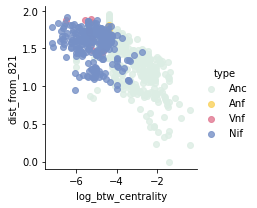

In [38]:
g = sns.lmplot(data=all_ssn_centrality, x='log_btw_centrality', y='dist_from_821', hue='type', palette=palette, height=3, aspect=1)
g.savefig('../figures/scatter-sequence-btwcentrality-distroot.png', dpi=300)
g.savefig('../figures/scatter-sequence-btwcentrality-distroot.svg')


In [39]:
from scipy.stats import linregress

In [40]:
x = all_ssn_centrality.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_btw_centrality', 'dist_from_821']).log_btw_centrality.values
y = all_ssn_centrality.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_btw_centrality', 'dist_from_821']).dist_from_821.values
linregress(x, y) 

LinregressResult(slope=-0.15393310838285912, intercept=0.7754666998938621, rvalue=-0.6466221013474185, pvalue=2.0693625921348935e-77, stderr=0.007172476631765616, intercept_stderr=0.030344133703350363)

## Visualization

In [186]:
nx.write_gml(all_ssn, './networks/all-ssn.07.gml')